In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import itertools
%load_ext line_profiler

import scqubits as qubit
import scqubits.utils.sweep_plotting as splot
import scqubits.utils.plotting as plot
from scqubits.utils.spectrum_utils import extract_phase, order_eigensystem
from scqubits import HilbertSpace, InteractionTerm, ParameterSweep
from scqubits.core.storage import SpectrumData

import numpy as np
import scipy as sp
import scipy.constants as const
from scipy import sparse
from scipy.special import hermite
import matplotlib.pyplot as plt
from matplotlib import cm

import scqubits.core.constants as constants
from scqubits.utils.spectrum_utils import get_matrixelement_table, matrix_element
from scqubits.core.discretization import GridSpec, Grid1d
from scqubits.core.qubit_base import QubitBaseClass
from scqubits.core.storage import WaveFunctionOnGrid

In [2]:
N = 3
kmax=1
ECB = 0.2 # 100 fF
ECJ = 20.0/2.7 # 2.7 fF
ECg = 20.0 # 1 fF
flux = 0.0
EJ = 18.9586
EJlist = np.array([EJ for j in range(2*N)])
nglist = np.array([0.0 for j in range(2*N)])
nglist[0] = 0.0
num_exc = 2
CMV = qubit.CurrentMirrorVCHOS(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                               kmax=kmax, num_exc=num_exc, squeezing=False, truncated_dim=6)
CMVG = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                      kmax=kmax, global_exc=num_exc, squeezing=False, truncated_dim=6)
CMVGS = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                      kmax=kmax, global_exc=num_exc, squeezing=True, truncated_dim=6)
CM = qubit.CurrentMirror(N, ECB, ECJ, ECg, EJlist, nglist, flux, ncut=7, truncated_dim=6)

In [11]:
eigs, vecs = sp.linalg.eigh(CMVG.inner_product())

In [12]:
print(eigs)

[0.99999767 0.99999767 0.99999776 ... 1.00001699 1.00001909 1.00001909]


In [3]:
CMVG.sorted_minima()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853,
        0.62831853, 0.62831853, 0.62831853, 0.62831853],
       [5.65486678, 5.65486678, 5.65486678, 5.65486678, 5.65486678,
        5.65486678, 5.65486678, 5.65486678, 5.65486678]])

In [4]:
flux_list = np.linspace(0.0, 1.0, 21)
specdata = CMVG.get_spectrum_vs_paramvals('flux', flux_list, evals_count = 6, get_eigenstates=True)
specdata.filewrite("CMVG_N_4_numexc_4")

In [6]:
datafromfile = SpectrumData.create_from_file("CMVG_N_4_numexc_4.hdf5")

TypeError: __init__() missing 1 required positional argument: 'energy_table'

In [16]:
print(datafromfile.)

dict_keys([])


In [4]:
print(CMVG.eigvec_population(eigvec[:,0]))

(array([ 9.95078708e-01,  3.64965310e-02,  3.64965310e-02,  3.64757641e-02,
        3.64757641e-02,  3.60731385e-02,  3.60731385e-02,  3.60634225e-02,
        8.90473869e-03,  8.90473869e-03,  6.40317184e-03,  6.40317184e-03,
        4.78557124e-03,  4.48065828e-03,  4.06852162e-03,  4.06852162e-03,
        4.03671613e-03,  4.03671613e-03,  4.03671613e-03,  4.03671613e-03,
       -3.85029482e-03,  2.98806180e-03, -2.98806180e-03,  2.84585659e-03,
        2.84585659e-03, -2.72256957e-03,  2.72256957e-03,  2.65243590e-03,
        2.65243590e-03,  2.57700163e-03,  2.57700163e-03,  2.57700163e-03,
        2.57700163e-03,  2.57403604e-03,  2.57403604e-03,  2.45491857e-03,
        2.45491857e-03,  2.16570484e-03,  2.09791343e-03, -2.09791343e-03,
       -2.09791343e-03, -2.09791343e-03, -2.02171300e-03,  2.02171300e-03,
        2.02171300e-03, -2.02171300e-03,  1.98298045e-03,  1.98298045e-03,
       -1.79563144e-03,  1.79019878e-03,  1.79019878e-03, -1.65939451e-03,
        1.65939451e-03, 

In [8]:
%time CMVG.eigenvals()

m, p =  0 0 (-1, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0) 95.88367762593543
m, p =  0 0 (-1, 0, 0, 0, 1, 0, -1, 0, 0, 0, 1) 99.61592902587748
m, p =  0 0 (-1, 0, 0, 1, 0, 0, -1, 0, 0, 1, 0) 100.82730464445463
m, p =  0 0 (-1, 0, 1, 0, 0, 0, -1, 0, 1, 0, 0) 99.61592902587579
m, p =  0 0 (-1, 1, 0, 0, 0, 0, -1, 1, 0, 0, 0) 95.88367762593478
m, p =  0 0 (0, -1, 0, 0, 0, 1, 0, -1, 0, 0, 0) 99.61592902587675
m, p =  0 0 (0, -1, 0, 0, 1, 0, 0, -1, 0, 0, 1) 100.82730464445478
m, p =  0 0 (0, -1, 0, 1, 0, 0, 0, -1, 0, 1, 0) 99.6159290258772
m, p =  0 0 (0, -1, 1, 0, 0, 0, 0, -1, 1, 0, 0) 95.88367762593433
m, p =  0 0 (0, 0, -1, 0, 0, 1, 0, 0, -1, 0, 0) 100.82730464445399
m, p =  0 0 (0, 0, -1, 0, 1, 0, 0, 0, -1, 0, 1) 99.61592902587614
m, p =  0 0 (0, 0, -1, 1, 0, 0, 0, 0, -1, 1, 0) 95.88367762593433
m, p =  0 0 (0, 0, 0, -1, 0, 1, 0, 0, 0, -1, 0) 99.6159290258767
m, p =  0 0 (0, 0, 0, -1, 1, 0, 0, 0, 0, -1, 1) 95.88367762593533
m, p =  0 0 (0, 0, 0, 0, -1, 1, 0, 0, 0, 0, -1) 95.88367762593529
m, p =  0

array([86.35152865, 88.14847296, 88.14847296, 90.42503733, 90.42503733,
       90.43199066])

In [33]:
phik_1 = np.array([-1, 0, 1, -1, 0])
phik_2 = np.array([-1, 1, 0, -1, 1])
phik_3 = np.array([0, -1, 1, 0, -1])
#print(np.dot(np.array([-1, 0, 1, -1, 0]), np.array([-1, 1, 0, -1, 1]))/(np.sqrt(3)*2))
dpkX_1 = np.matmul(delta_inv, phik_1)
dpkX_2 = np.matmul(delta_inv, phik_2)
dpkX_3 = np.matmul(delta_inv, phik_3)
print(dpkX_1, dpkX_2, dpkX_3)

[-1.19903871e+00 -5.99519356e-01  4.88498131e-15 -1.19903871e+00
 -5.99519356e-01] [-5.99519356e-01  5.99519356e-01  8.88178420e-16 -5.99519356e-01
  5.99519356e-01] [-5.99519356e-01 -1.19903871e+00  3.55271368e-15 -5.99519356e-01
 -1.19903871e+00]


In [44]:
Xi = CMVG.Xi_matrix()
Xi_inv = sp.linalg.inv(Xi)
evalsxi, evecsxi = sp.linalg.eig(Xi_inv)
#print(Xi_inv)
print(evalsxi)
print(evecsxi)
delta_inv = np.matmul(Xi_inv.T, Xi_inv)
#print(delta_inv)
evals, evecs = sp.linalg.eigh(delta_inv)
print(evals)
#print(evecs[:,2])
#print(evecs[:,3])
print(evecs[:,0])
print(evecs[:,1])

[ 3.40554675+0.j          1.04295503+0.61359158j  1.04295503-0.61359158j
  0.02596119+1.43551626j  0.02596119-1.43551626j -1.65041704+0.j
 -1.36487496+0.j        ]
[[-0.43589145+0.j         -0.17441221-0.28040948j -0.17441221+0.28040948j
  -0.29839499-0.40679528j -0.29839499+0.40679528j -0.68056919+0.j
   0.35180214+0.j        ]
 [-0.70632377+0.j          0.25330516+0.37097416j  0.25330516-0.37097416j
  -0.14102344+0.29700037j -0.14102344-0.29700037j -0.16005921+0.j
   0.41240495+0.j        ]
 [-0.4462041 +0.j         -0.4502077 +0.09414549j -0.4502077 -0.09414549j
  -0.2540201 -0.17086302j -0.2540201 +0.17086302j  0.64037869+0.j
  -0.60560243+0.j        ]
 [-0.19868068+0.j          0.20834793+0.00703964j  0.20834793-0.00703964j
   0.5829043 +0.j          0.5829043 -0.j          0.05874976+0.j
  -0.21737439+0.j        ]
 [ 0.10606262+0.j          0.15801112-0.38720884j  0.15801112+0.38720884j
  -0.13832726-0.0735677j  -0.13832726+0.0735677j   0.18650308+0.j
  -0.0536571 +0.j        ]
 

In [16]:
print(eigvals)

[6.76252592e+00+0.j 6.71954229e+00+0.j 6.60247130e+00+0.j
 6.48936423e+00+0.j 6.11232503e+00+0.j 5.84179235e+00+0.j
 4.73905775e+00+0.j 3.76078830e+00+0.j 2.83586914e+00+0.j
 3.68931858e-01+0.j 3.43262285e-01+0.j 3.03049986e-01+0.j
 2.52184573e-01+0.j 1.93798450e-01+0.j 1.37815857e-01+0.j
 8.11342701e-02+0.j 4.35692676e-02+0.j 2.91288860e-03+0.j
 9.72720646e-03+0.j]


In [12]:
CM.eigenvals()

array([37.601148  , 41.16169766, 41.58431718, 44.58687847, 44.74803526,
       45.28464285])

In [13]:
print(np.exp(-0.25*180))

2.8625185805493937e-20


In [9]:
CMVGevals = CMVG.eigenvals()
CMVGSevals = CMVGS.eigenvals()

In [10]:
print(CMVGevals)
print(CMVGSevals)

[48.5691947  51.46612789 51.88274427 51.88274427 54.72919294 54.72919295]
[48.5691947  51.46073173 51.88274427 51.88274427 54.72253302 54.72253303]


In [11]:
CMevals = CM.eigenvals()

In [12]:
print(CMevals)

[48.53400497 51.42091481 51.76653164 51.78482204 54.57578881 54.5914451 ]


In [23]:
hilbertspcvchos = HilbertSpace([CMVG])
hilbertspcvchos.interaction_list = []
points = 11
param_name = 'ng'
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CMVG]

def update_hilbertspace(param_val):
    nglist = np.zeros(2*N)
    nglist[0] = param_val
    V_m = CMVG._build_V_m()
    CMVG.nglist = np.dot(sp.linalg.inv(V_m).T, nglist)[0:-1]
    
sweep = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspcvchos,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace)

In [24]:
hilbertspcED = HilbertSpace([CM])
hilbertspcED.interaction_list = []
points = 11
param_name = 'ng'
param_vals = np.linspace(0.0, 1.0, points)

subsys_update_list = [CM]

def update_hilbertspace(param_val):
    nglist = np.zeros(2*N)
    nglist[0] = param_val
    V_m = CM._build_V_m()
    CM.nglist = np.dot(sp.linalg.inv(V_m).T, nglist)[0:-1]
    
sweepED = ParameterSweep(param_name=param_name, param_vals=param_vals,
                       evals_count=6, hilbertspace=hilbertspcED,
                       subsys_update_list=subsys_update_list,
                       update_hilbertspace=update_hilbertspace)

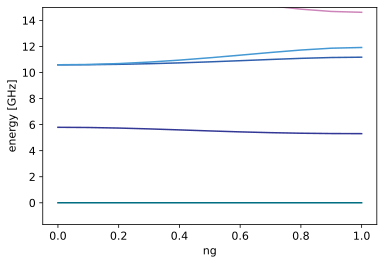

In [25]:
splot.dressed_spectrum(sweep);

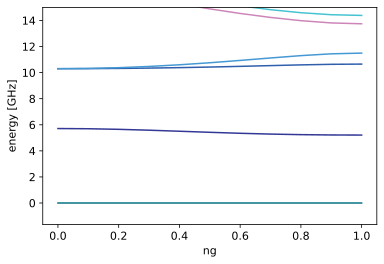

In [26]:
splot.dressed_spectrum(sweepED);

In [7]:
CMVG.flux=0.49
CMVG.eigenvals()

array([92.29396723, 92.78593649, 94.51633669, 94.51633669, 95.01706653,
       95.01706653])

In [8]:
evals, evecs = CMVG.eigensys()

In [15]:
print(evecs[:,5])

[-3.98949674e-14+0.j  6.22280715e-10+0.j -2.00002836e-08+0.j
  2.83627439e-14+0.j -2.50621365e-16+0.j  9.10941232e-15+0.j
 -1.16887452e-14+0.j -3.99283310e-16+0.j  1.10872549e-16+0.j
 -9.44693595e-16+0.j -5.53561624e-16+0.j  9.47766780e-16+0.j
  1.17981629e-13+0.j  2.34328677e-13+0.j  5.42845402e-14+0.j
  5.20714722e-16+0.j  1.82696912e-14+0.j -2.67507080e-14+0.j
  2.05750274e-10+0.j -7.56786198e-12+0.j -4.75990476e-15+0.j
 -1.71030583e-15+0.j  3.48319905e-15+0.j  2.50749817e-13+0.j
  7.36366727e-14+0.j  4.13757822e-15+0.j  2.49205151e-14+0.j
 -3.65027171e-14+0.j -7.57466042e-12+0.j -2.05751150e-10+0.j
 -6.48815528e-15+0.j -2.39549760e-15+0.j  4.98811864e-15+0.j
  2.26629332e-14+0.j -1.55990104e-16+0.j  1.35064691e-14+0.j
 -1.96454173e-14+0.j  7.83761611e-11+0.j  1.94144076e-11+0.j
  6.08392206e-11+0.j -1.50703340e-11+0.j  3.68327141e-15+0.j
 -5.09524555e-16+0.j -3.49382690e-17+0.j  9.10616670e-16+0.j
  1.94126158e-11+0.j -7.83796500e-11+0.j -1.50693450e-11+0.j
 -6.08435021e-11+0.j  2.

(<Figure size 900x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2c5e6d64d0>)

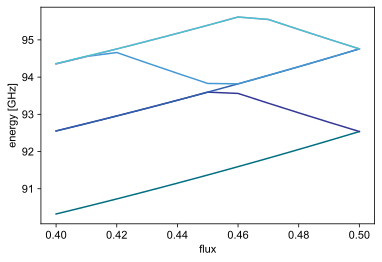

In [6]:
flux_list = np.linspace(0.4, 0.5, 11)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=6, subtract_ground=False)

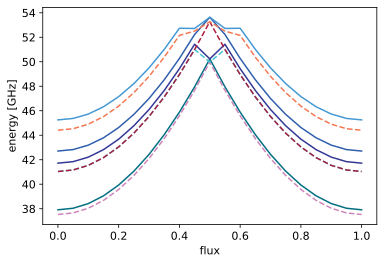

In [4]:
flux_list = np.linspace(0.0, 1.0, 21)
fig, axes = CM.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False)
CMVG.plot_evals_vs_paramvals('flux', flux_list, evals_count=4, subtract_ground=False, fig_ax=[fig, axes])
axes.properties()['children'][4].set_linestyle('--')
axes.properties()['children'][5].set_linestyle('--')
axes.properties()['children'][6].set_linestyle('--')
axes.properties()['children'][7].set_linestyle('--')

In [24]:
x = np.array([[0,1], [1,0]])
xs = np.array([x, x])
print(xs)
np.matrix.prod(xs, axis=0)

[[[0 1]
  [1 0]]

 [[0 1]
  [1 0]]]


AttributeError: 'numpy.ndarray' object has no attribute '_collapse'

In [4]:
%lprun -f CMVG.kineticmat CMVG.kineticmat()

In [3]:
a_op_list = np.array([CMVG.a_operator(i) for i in range(CMVG.num_deg_freedom)])
minima_list = CMVG.sorted_minima()
minima_diff = minima_list[1]-minima_list[2]
Xi = CMVG.Xi_matrix()
%lprun -f CMVG._build_squeezing_ops CMVG._build_squeezing_ops(1, 2, minima_diff, Xi, a_op_list)

In [7]:
%lprun -f CMVG.potentialmat CMVG.potentialmat()

In [28]:
%lprun -f CMV.potentialmat CMV.potentialmat()

In [26]:
%lprun -f CMV.hamiltonian CMV.hamiltonian()

In [5]:
eigvals = CMV.eigenvals()
print(eigvals)

[37.51394954 41.0467031  41.04677482 44.44385195 44.54820087 44.56440727]


In [7]:
eigvals = CMV.eigenvals()
print(eigvals-eigvals[0])

[0.         2.79611152 2.81102498 5.58158613 5.59865452 5.60723912]


In [3]:
evals_holder_vchos = []
for ncut in range(1, 4):
    print(ncut)
    CMVG = qubit.CurrentMirrorVCHOSGlobal(N, ECB, ECJ, ECg, EJlist, nglist, flux, 
                                           kmax=1, global_exc=ncut, squeezing=False)
    evals = CMVG.eigenvals()
    evals_holder_vchos.append(evals)

1
2
3


In [4]:
evals_holder_ED = []
for ncut in range(1, 6):
    print(ncut)
    CM = qubit.CurrentMirror(N, ECB, ECJ, ECg, EJlist, nglist, flux, ncut=ncut)
    evals = CM.eigenvals()
    evals_holder_ED.append(evals)

1
2
3
4
5


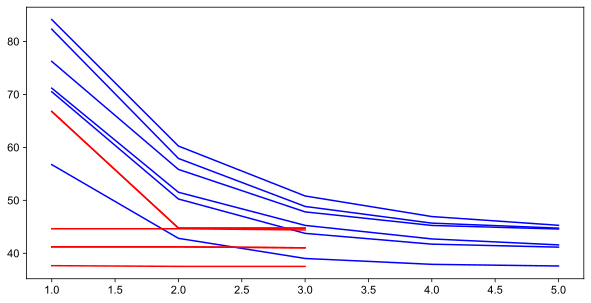

In [5]:
ncut_list = np.arange(1, 6)
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(ncut_list, evals_holder_ED, color="blue")
plt.plot(ncut_list[0:3], evals_holder_vchos, color="red")
plt.show()

In [11]:
print(evals_holder)

[array([56.70140312, 70.46042775, 71.13782448, 76.19151844, 82.26184779,
       84.08820282]), array([42.80612023, 50.22657124, 51.50082666, 55.82116382, 57.87979284,
       60.22545979]), array([39.01382439, 43.75076327, 45.25837763, 47.81235394, 48.82732037,
       50.8098161 ]), array([37.91111698, 41.7203811 , 42.70902272, 45.25314106, 45.68702751,
       46.93290294]), array([37.60014853, 41.15974483, 41.58172879, 44.58520793, 44.7446738 ,
       45.28091933]), array([37.52073588, 41.03067135, 41.1629697 , 44.41647763, 44.52028604,
       44.689744  ])]
